In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
plt.style.use('ggplot')
import seaborn as sb

In [3]:
df = pd.read_csv('C:/Users/emmat/Desktop/database/cardotcom_data.csv', index_col=False)
df.head(5)

,site,car_id,car_descrip,car_make,car_model,car_trim,car_year,car_category,car_mileage,car_price,car_extColor,car_transmission,car_driveTrain,car_vendor,car_location,car_detail_link,car_img_link,Unnamed: 17,Unnamed: 18
0,carsDotCom,699097326,Used 2014 BMW M5 Base,BMW,M5,Base,2014,Used,30000,56500,NaN,NaN,NaN,Omar (Private Seller),Washington,DC,https://www.cars.com/vehicledetail/detail/6990...,https://www.cstatic-images.com/phototab/SIY/17...,NaN
1,carsDotCom,703358833,Used 2010 BMW X5 xDrive35d,BMW,X5,xDrive35d,2010,Used,58768,19999,NaN,NaN,NaN,David (Private Seller),Washington,DC,https://www.cars.com/vehicledetail/detail/7033...,https://www.cstatic-images.com/phototab/SIY/88...,NaN
2,carsDotCom,704738631,Used 2008 Chrysler Sebring,Chrysler,Sebring,null,2008,Used,88000,5000,NaN,NaN,NaN,joseph (Private Seller),Washington,DC,https://www.cars.com/vehicledetail/detail/7047...,https://www.cstatic-images.com/phototab/SIY/13...,NaN
3,carsDotCom,705384215,Used 2009 Subaru Impreza 2.5 i,Subaru,Impreza,2.5 i,2009,Used,93651,6300,NaN,NaN,NaN,Karen (Private Seller),Washington,DC,https://www.cars.com/vehicledetail/detail/7053...,https://www.cstatic-images.com/phototab/SIY/50...,NaN
4,carsDotCom,703829198,Used 2006 Toyota Land Cruiser,Toyota,Land Cruiser,null,2006,Used,178000,15000,NaN,NaN,NaN,Erin (Private Seller),Washington,DC,https://www.cars.com/vehicledetail/detail/7038...,https://www.cstatic-images.com/phototab/SIY/86...,NaN


In [4]:
# how many columns and rows has this data set
df.shape

(5011, 19)

# Looking for missing values by columns

In [5]:
df.isnull().sum()

site                   0
car_id                 0
car_descrip            0
car_make               0
car_model            397
car_trim               0
car_year               0
car_category           0
car_mileage            0
car_price              0
car_extColor        4022
car_transmission    4022
car_driveTrain      4023
car_vendor             0
car_location           0
car_detail_link        0
car_img_link           0
Unnamed: 17            0
Unnamed: 18         5010
dtype: int64

# The variable car_price has some -1 and 1 that need to be consider as missing values. How many rows have either -1 or 1 ?

In [122]:
# we see that there are 70 rows with -1 or 1 values

df[df['car_price'].isin([-1,1])].shape

(70, 19)

In [86]:
# we can estimate the percentage of those missing values in the entiere data set 

(70/5011)*100

1.3969267611255238

# we should also check if there are some car prices below 1000 dolars. if so why?

In [148]:
df[df.car_price < 1000].shape

(72, 19)

# There are 72 cars that have the price below 1000 dolars. if we consider 70 cars that have the value 1 or -1. it appears that only 2 cars are below 1000 dolars. We will check the reason later.

# How many car prices are in between 1000 and 3000 dolars ?

In [89]:
df[(df.car_price >=1000) & (df.car_price <= 3000)].shape

(31, 19)

# Looking for outlier. We know that -1 and 1 are outliers. we will fix them as missing values. so now How many car prices are above 100,000 dolars? All the car above that price might be considered as outliers.


In [152]:
df[df.car_price >=100000].shape

(22, 19)

# # all columns names

In [153]:
# let's find all columns name
df.columns

Index(['site', 'car_id', 'car_descrip', 'car_make', 'car_model', 'car_trim',
       'car_year', 'car_category', 'car_mileage', 'car_price', 'car_extColor',
       'car_transmission', 'car_driveTrain', 'car_vendor', 'car_location',
       'car_detail_link', 'car_img_link', 'Unnamed: 17', 'Unnamed: 18'],
      dtype='object')

#  let drop all the columns that we do not need¶ 

In [156]:
Data= df.drop(['site','car_id', 'car_location', 'car_trim', 
               'car_img_link','Unnamed: 17','Unnamed: 18',
               'car_detail_link', 'car_vendor', 'car_transmission', 
               'car_category','car_driveTrain', 'car_extColor'], axis=1)
Data.tail(10)

,car_descrip,car_make,car_model,car_year,car_mileage,car_price
5001,Used 2014 Nissan Pathfinder SV,Nissan,Pathfinder,2014,43234,18999
5002,Used 2013 Buick LaCrosse Leather,Buick,LaCrosse,2013,43639,16899
5003,Used 2013 Nissan Murano SL,Nissan,Murano,2013,43788,16999
5004,Used 2013 Nissan Juke SL,Nissan,Juke,2013,44292,14999
5005,Used 2015 Nissan Rogue SL,Nissan,Rogue,2015,44662,19999
5006,Used 2011 BMW Z4 sDrive30i,BMW,Z4,2011,44735,22900
5007,Used 2016 Ford Fusion SE,Ford,Fusion,2016,45550,14000
5008,Used 2014 Nissan Maxima SV,Nissan,Maxima,2014,48265,18999
5009,Used 2012 Nissan Rogue SV,Nissan,Rogue,2012,49232,12999
5010,Used 2014 Nissan Murano S,Nissan,Murano,2014,49456,16999


# How many columns and row do we have now?

In [157]:
Data.shape

(5011, 6)

# Let see how many rows have -1 in the variable car_price


In [158]:
New= Data[Data['car_price'].isin([-1,1])]
New

,car_descrip,car_make,car_model,car_year,car_mileage,car_price
466,Used 2017 Toyota Corolla LE,Toyota,Corolla,2017,1323,-1
477,Used 2011 Honda Civic LX,Honda,Civic,2011,21330,-1
484,Used 2015 Toyota Highlander,Toyota,Highlander,2015,24584,-1
486,Used 2015 Ford Mustang GT,Ford,Mustang,2015,26350,-1
492,Used 2016 Hyundai Santa Fe Sport 2.4L,Hyundai,Santa Fe Sport,2016,29089,-1
535,Used 2006 Volkswagen Jetta Value Edition,Volkswagen,Jetta,2006,64797,-1
541,Used 2007 Acura RL,Acura,RL,2007,68213,-1
565,Used 2010 Ford Escape XLT,Ford,Escape,2010,106919,-1
569,Used 2005 Toyota Camry LE,Toyota,Camry,2005,116766,-1
571,Used 1998 Toyota Corolla,Toyota,Corolla,1998,134558,-1


In [126]:
# there are a total of 70 rows with values -1 and 1
New.shape

(70, 6)

# Using the website from where each car is sold, we have fixed the missing value -1 and 1 by hand. let's look at how the new data set looks like.

In [8]:
DF = pd.read_csv('C:/Users/emmat/Desktop/database/cardotcom_corrected.csv', index_col=False)
df.head(5)

,site,car_id,car_descrip,car_make,car_model,car_trim,car_year,car_category,car_mileage,car_price,car_extColor,car_transmission,car_driveTrain,car_vendor,car_location,car_detail_link,car_img_link,Unnamed: 17,Unnamed: 18
0,carsDotCom,699097326,Used 2014 BMW M5 Base,BMW,M5,Base,2014,Used,30000,56500,NaN,NaN,NaN,Omar (Private Seller),Washington,DC,https://www.cars.com/vehicledetail/detail/6990...,https://www.cstatic-images.com/phototab/SIY/17...,NaN
1,carsDotCom,703358833,Used 2010 BMW X5 xDrive35d,BMW,X5,xDrive35d,2010,Used,58768,19999,NaN,NaN,NaN,David (Private Seller),Washington,DC,https://www.cars.com/vehicledetail/detail/7033...,https://www.cstatic-images.com/phototab/SIY/88...,NaN
2,carsDotCom,704738631,Used 2008 Chrysler Sebring,Chrysler,Sebring,null,2008,Used,88000,5000,NaN,NaN,NaN,joseph (Private Seller),Washington,DC,https://www.cars.com/vehicledetail/detail/7047...,https://www.cstatic-images.com/phototab/SIY/13...,NaN
3,carsDotCom,705384215,Used 2009 Subaru Impreza 2.5 i,Subaru,Impreza,2.5 i,2009,Used,93651,6300,NaN,NaN,NaN,Karen (Private Seller),Washington,DC,https://www.cars.com/vehicledetail/detail/7053...,https://www.cstatic-images.com/phototab/SIY/50...,NaN
4,carsDotCom,703829198,Used 2006 Toyota Land Cruiser,Toyota,Land Cruiser,null,2006,Used,178000,15000,NaN,NaN,NaN,Erin (Private Seller),Washington,DC,https://www.cars.com/vehicledetail/detail/7038...,https://www.cstatic-images.com/phototab/SIY/86...,NaN


# The variable car_price has some missing values that are -1 and 1.We first need to replace all those values by non a values (NaN)

In [9]:
New_Data = DF.drop(['site','car_id', 'car_location', 'car_trim', 'car_img_link','Unnamed: 17','Unnamed: 18','car_detail_link', 'car_vendor', 'car_transmission', 'car_category','car_driveTrain', 'car_extColor'], axis=1)
New_Data

,car_descrip,car_make,car_model,car_year,car_mileage,car_price
0,Used 2014 BMW M5 Base,BMW,M5,2014,30000,56500
1,Used 2010 BMW X5 xDrive35d,BMW,X5,2010,58768,19999
2,Used 2008 Chrysler Sebring,Chrysler,Sebring,2008,88000,5000
3,Used 2009 Subaru Impreza 2.5 i,Subaru,Impreza,2009,93651,6300
4,Used 2006 Toyota Land Cruiser,Toyota,Land Cruiser,2006,178000,15000
5,Used 2001 Toyota 4Runner SR5,Toyota,4Runner,2001,259850,2700
6,Used 2013 Honda Accord LX-S,Honda,Accord,2013,47000,13500
7,Used 2014 Chrysler 300C Base,Chrysler,300C,2014,60600,16200
8,Used 1985 Nissan 300ZX 2+2,Nissan,300ZX,1985,123000,2199
9,Used 2007 Jeep Wrangler Unlimited X,Jeep,Wrangler,2007,98000,14000


# How many -1 and 1 are there in this new data set?

In [10]:
New_Data[New_Data['car_price'].isin([-1,1])]

,car_descrip,car_make,car_model,car_year,car_mileage,car_price
565,Used 2010 Ford Escape XLT,Ford,Escape,2010,106919,-1
569,Used 2005 Toyota Camry LE,Toyota,Camry,2005,116766,-1
571,Used 1998 Toyota Corolla,Toyota,Corolla,1998,134558,-1
573,Used 1999 Honda CR-V EX,Honda,CR-V,1999,139827,-1
575,Used 2002 Mitsubishi Eclipse GS,Mitsubishi,Eclipse,2002,181001,-1
1399,Used 2012 Chevrolet Tahoe Special Services,Chevrolet,Tahoe,2012,71641,-1
1546,Used 2014 Mercedes-Benz SL 550,Mercedes-Benz,NaN,2014,0,-1
1547,Used 2017 Jeep Wrangler Unlimited Sport,Jeep,Wrangler Unlimited,2017,962,-1
1677,Used 2005 Mercedes-Benz G 55 AMG,Mercedes-Benz,NaN,2005,78538,-1
1691,Used 2016 Lexus NX 200t,Lexus,NX 200t,2016,6278,-1


# There are now only 14 missing value in car_price variable. we can fix them by just dropping them. First let replace all the -1 and 1 by NaN

In [11]:
# # Replacing all -1 and 1 values by NaN

New_Data.replace([1,-1],  np.NaN).tail(20)

,car_descrip,car_make,car_model,car_year,car_mileage,car_price
4991,Used 2013 INFINITI G37 x,INFINITI,G37,2013,36273.0,19999.0
4992,Used 2012 Nissan Sentra 2.0 SR,Nissan,Sentra,2012,36600.0,8999.0
4993,Used 2013 Nissan Maxima SV,Nissan,Maxima,2013,37470.0,16499.0
4994,Used 2013 Nissan Juke SV,Nissan,Juke,2013,38166.0,12399.0
4995,Used 2013 Nissan Sentra SR,Nissan,Sentra,2013,38754.0,9899.0
4996,Used 2011 Honda Civic EX,Honda,Civic,2011,40220.0,10899.0
4997,Used 2013 Nissan Murano SL,Nissan,Murano,2013,40229.0,17999.0
4998,Used 2015 Nissan Altima 2.5 S,Nissan,Altima,2015,41193.0,13900.0
4999,Used 2015 Nissan Altima 2.5 S,Nissan,Altima,2015,41645.0,11899.0
5000,Used 2015 Chevrolet Malibu 1FL,Chevrolet,Malibu,2015,42590.0,11799.0


In [12]:
New_Data.shape

(5011, 6)

# We can now drop all the rows with NaN. There are only 14 among 5011

In [13]:
Data_cleaned= New_Data.dropna(axis=0)
Data_cleaned

,car_descrip,car_make,car_model,car_year,car_mileage,car_price
0,Used 2014 BMW M5 Base,BMW,M5,2014,30000,56500
1,Used 2010 BMW X5 xDrive35d,BMW,X5,2010,58768,19999
2,Used 2008 Chrysler Sebring,Chrysler,Sebring,2008,88000,5000
3,Used 2009 Subaru Impreza 2.5 i,Subaru,Impreza,2009,93651,6300
4,Used 2006 Toyota Land Cruiser,Toyota,Land Cruiser,2006,178000,15000
5,Used 2001 Toyota 4Runner SR5,Toyota,4Runner,2001,259850,2700
6,Used 2013 Honda Accord LX-S,Honda,Accord,2013,47000,13500
7,Used 2014 Chrysler 300C Base,Chrysler,300C,2014,60600,16200
8,Used 1985 Nissan 300ZX 2+2,Nissan,300ZX,1985,123000,2199
9,Used 2007 Jeep Wrangler Unlimited X,Jeep,Wrangler,2007,98000,14000


In [14]:
# The cleaned data set has now 4614 rows and 6 columns
Data_cleaned.shape

(4614, 6)

# Checking if there is no more missing values at all in any given columns that we retained for the analysis

In [15]:
Data_cleaned.isnull().sum()

car_descrip    0
car_make       0
car_model      0
car_year       0
car_mileage    0
car_price      0
dtype: int64

In [19]:
Data_cleaned.to_csv('cardotcom_data.csv')

In [20]:
pwd

'C:\\Users\\emmat'

# Practically no missing values, let's do basic descriptive statistics

In [169]:
# descriptive statistics
Data_cleaned.describe()

,car_year,car_mileage,car_price
count,4614.000000,4614.000000,4614.000000
mean,2013.430429,40865.394452,21611.407022
std,4.145552,35656.815925,11440.317069
min,1928.000000,-1.000000,-1.000000
25%,2013.000000,18808.500000,14750.000000
50%,2014.000000,31061.500000,19750.000000
75%,2015.750000,47792.750000,26665.750000
max,2017.000000,352000.000000,163491.000000


In [171]:
Data_cleaned.groupby(['car_make']).car_price.agg(['count', 'mean', 'max', 'min'])

,count,mean,max,min
car_make,,,,
Acura,245,26933.800000,50342,1999
Alfa Romeo,1,7500.000000,7500,7500
Aston Martin,1,62000.000000,62000,62000
Audi,159,31322.352201,66574,4990
BMW,275,24768.727273,56966,1250
Bentley,2,59966.000000,62966,56966
Buick,73,19799.452055,33750,3300
Cadillac,121,29188.826446,72890,4400
Chevrolet,322,19970.481366,59749,-1


In [172]:
Data_cleaned.groupby(['car_mileage']).car_price.agg(['count', 'mean', 'max', 'min'])

,count,mean,max,min
car_mileage,,,,
-1,8,18999.750000,36900,-1
0,13,19876.615385,26777,10999
1,3,13631.333333,21999,5900
10,3,32568.333333,34230,29840
17,1,39900.000000,39900,39900
60,1,33590.000000,33590,33590
96,1,23997.000000,23997,23997
107,1,25000.000000,25000,25000
122,1,4900.000000,4900,4900


In [174]:
Data_cleaned.groupby('car_make',  ).car_price.count()

car_make
Acura            245
Alfa Romeo         1
Aston Martin       1
Audi             159
BMW              275
Bentley            2
Buick             73
Cadillac         121
Chevrolet        322
Chrysler         149
Citroen            1
Dodge            171
FIAT              14
Ferrari            2
Ford             335
GMC               86
Honda            326
Hummer             2
Hyundai          255
INFINITI          86
Jaguar            23
Jeep             150
Kia               84
Land Rover        29
Lexus            253
Lincoln           62
MG                 1
MINI              42
Maserati          10
Mazda             83
McLaren            1
Mercedes-Benz     12
Mercury            7
Mitsubishi        22
Nissan           329
Pontiac            5
Porsche           57
RAM               32
Saab               2
Saturn             1
Scion             15
Subaru            56
Tesla              1
Toyota           467
Triumph            1
Volkswagen       179
Volvo             57
smar

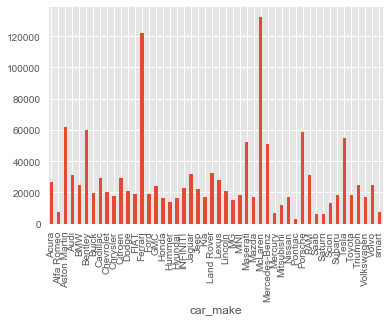

In [175]:
Data_cleaned.groupby('car_make').car_price.mean().plot(kind='bar')
